<a href="https://colab.research.google.com/github/juliagrodrigues/lia1_2024_1/blob/main/Entregas_J%C3%BAlia_Gomes/Aula_08_Construindo_um_modelo_com_TensorFlow_Fashion-MNIST_10ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Cifar-10**

Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙

**Fonte de dados**

Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes.

In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os dados de modelos e teste**

In [2]:
# Carrega o dataset Fashion MNIST - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Classes das imagens
nomes_classes = ['camisetas','calças', 'sueteres', 'vestido', 'casacos', 'sandalias', 'camisas', 'tenis', 'bolsas', 'botas']

# **Pré-processamento**


In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

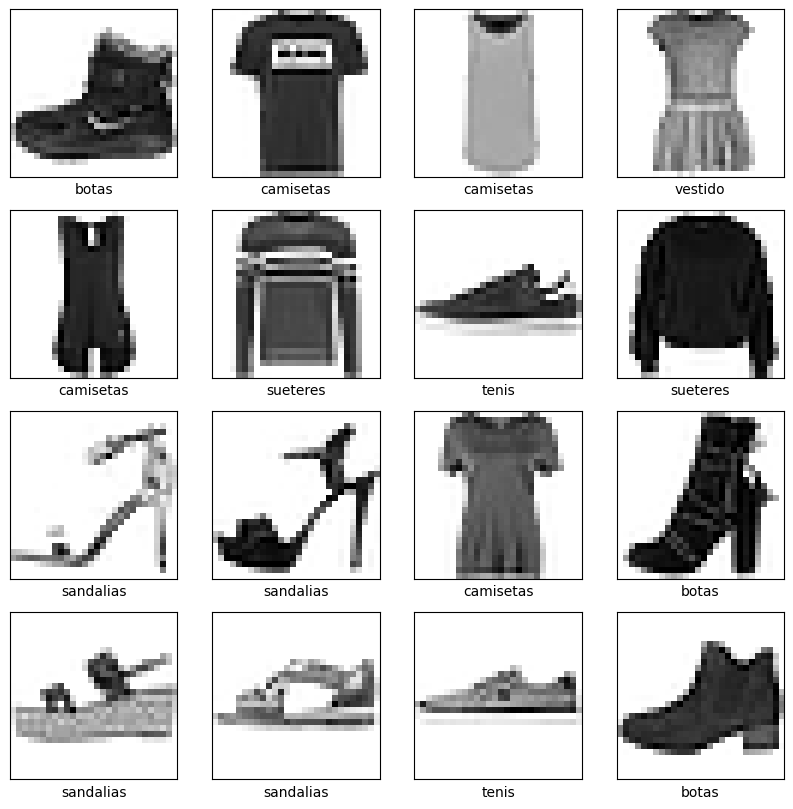

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

Construindo a Rede Neural Convolucional
O Keras é uma biblioteca do TensorFlow.

In [7]:
# Arquitetura do Modelo -> Feature Learning

In [8]:
# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

In [9]:
# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [10]:
# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))


In [11]:
# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [12]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [41]:
# Compile o modelo antes de treiná-lo
modelo_lia.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [42]:
# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

In [15]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 16,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/16
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5800 - accuracy: 0.7888 - val_loss: 0.4605 - val_accuracy: 0.8303
Epoch 2/16
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3912 - accuracy: 0.8568 - val_loss: 0.3774 - val_accuracy: 0.8600
Epoch 3/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3404 - accuracy: 0.8752 - val_loss: 0.3588 - val_accuracy: 0.8714
Epoch 4/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3079 - accuracy: 0.8877 - val_loss: 0.3355 - val_accuracy: 0.8781
Epoch 5/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8963 - val_loss: 0.3289 - val_accuracy: 0.8803
Epoch 6/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9037 - val_loss: 0.3292 - val_accuracy: 0.8817
Epoch 7/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2414 - accuracy: 0.9103 - val_loss: 0.3249 - val_accuracy

Previsão - Testar o modelo (Deploy)

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.


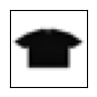

In [44]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/images/camiseta.jpg")

# Redimensiona para 28x28 pixels
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [45]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0


In [46]:
# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [47]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 250ms/step


In [48]:
print(previsoes)

[[8.1457287e-01 5.3822106e-07 1.2563680e-01 3.2715615e-02 2.6384005e-04
  4.3443342e-05 2.2171788e-02 4.3121497e-09 4.3587009e-03 2.3638809e-04]]


In [49]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]


In [50]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: camisetas
